# **Load Dataset and Explore Initial Data**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the CSV file
csv_path = '/content/extended_activities.csv'
act_data = pd.read_csv(csv_path)

# Display the first 10 rows of the dataset
print("Preview of the dataset (First 10 rows):")
print(act_data.head(10))


Preview of the dataset (First 10 rows):
   Activity ID          Activity Date   Activity Name Activity Type  \
0   2929442069  13 Dec 2019, 01:46:07      Lunch Ride          Ride   
1   2945780637  20 Dec 2019, 23:05:01    Morning Ride          Ride   
2   2948028275  21 Dec 2019, 23:25:29    Morning Ride          Ride   
3   2952462113  24 Dec 2019, 01:19:17      Lunch Ride          Ride   
4   2956494096  26 Dec 2019, 00:09:08      Lunch Ride          Ride   
5   2961293151  27 Dec 2019, 23:38:08    Morning Ride          Ride   
6   2969244332  31 Dec 2019, 01:48:12      Lunch Ride          Ride   
7   2974544942   2 Jan 2020, 03:43:00  Afternoon Ride          Ride   
8   2979711652   3 Jan 2020, 23:27:55    Morning Ride          Ride   
9   2982905280   5 Jan 2020, 01:30:44      Lunch Ride          Ride   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          3859     22.97           139.0             11.0    False   
1          4852     29.65           




  **- Imported essential libraries including `pandas`, `numpy`, `matplotlib.pyplot`, and `seaborn` to perform data manipulation, visualization, and exploratory analysis.**


   **- Loaded the dataset named `'extended_activities.csv'` using Pandas to read and store it into a DataFrame for subsequent analysis.**


   **- Displayed the first 10 rows of the dataset to understand its structure, data types, and get an initial impression of the columns available for analysis.**

# **Date Formatting and Sorting**

In [2]:
# Convert the 'Activity Date' column to a datetime object
act_data["Activity Date"] = pd.to_datetime(act_data["Activity Date"], errors='coerce')

# Sort the dataset by 'Activity Date' in ascending order
act_data.sort_values(by=["Activity Date"], inplace=True)

# Convert 'Activity Date' back to a string format for readability
act_data["Activity Date"] = act_data["Activity Date"].dt.strftime("%d-%m-%Y")


**- Converted the 'Activity Date' column to a datetime object to enable accurate sorting and manipulation of dates.**

**- Sorted the dataset by 'Activity Date' in ascending order to arrange activities chronologically.**

**- Converted 'Activity Date' back to a string format to improve readability, using a more conventional "day-month-year" representation.**

## **Filter Cycling Data**

In [3]:
# Filter the dataset to include only cycling activities
act_data_cyc = act_data[act_data['Activity Type'] == 'Ride']

# Display the first 10 rows of filtered cycling data
print("\nFiltered cycling data (First 10 rows):")
print(act_data_cyc.head(10))



Filtered cycling data (First 10 rows):
   Activity ID Activity Date   Activity Name Activity Type  Elapsed Time  \
0   2929442069    13-12-2019      Lunch Ride          Ride          3859   
1   2945780637    20-12-2019    Morning Ride          Ride          4852   
2   2948028275    21-12-2019    Morning Ride          Ride          5817   
3   2952462113    24-12-2019      Lunch Ride          Ride          3851   
4   2956494096    26-12-2019      Lunch Ride          Ride          5843   
5   2961293151    27-12-2019    Morning Ride          Ride          6953   
6   2969244332    31-12-2019      Lunch Ride          Ride          5567   
7   2974544942    02-01-2020  Afternoon Ride          Ride          3727   
8   2979711652    03-01-2020    Morning Ride          Ride          7352   
9   2982905280    05-01-2020      Lunch Ride          Ride          5913   

   Distance  Max Heart Rate  Relative Effort  Commute Activity Gear  ...  \
0     22.97           139.0             11.0   

**- Filtered the dataset to include only rows where the 'Activity Type' is 'Ride', effectively isolating cycling activities for further analysis.**

**- Created a new dataset specifically for cycling data named `act_data_cyc`.**

**- Displayed the first 10 rows of the filtered dataset to preview the cycling-related activities.**

# **Cycling Data Exploration and Summary**

In [4]:
# Generate summary statistics for cycling data
print("\nSummary statistics for cycling data:")
print(act_data_cyc.describe())

# Display information about the cycling dataset
print("\nCycling data information:")
print(act_data_cyc.info())

# Check for missing values in each column
missing_data = act_data_cyc.isnull().sum()

# Display missing values summary
print("\nCount of missing values in each column:")
print(missing_data)



Summary statistics for cycling data:
        Activity ID  Elapsed Time    Distance  Max Heart Rate  \
count  1.810000e+02    181.000000  181.000000      181.000000   
mean   5.716277e+09   7419.679558   54.417569      145.154696   
std    2.432000e+09   3703.592560   28.127591       13.875572   
min    2.929442e+09   1626.000000   10.960000      118.000000   
25%    3.218871e+09   5635.000000   38.110000      137.000000   
50%    7.128178e+09   6757.000000   50.890000      143.000000   
75%    8.084769e+09   7998.000000   60.970000      150.000000   
max    1.027158e+10  22391.000000  180.080000      209.000000   

       Relative Effort  Athlete Weight  Bike Weight   Moving Time   Max Speed  \
count       181.000000       70.000000        162.0    181.000000  181.000000   
mean         34.375691       80.228571          8.0   7155.767956   12.226391   
std          28.137406        0.935165          0.0   3568.567951    2.235716   
min           5.000000       80.000000          8.0 

**- Generated summary statistics for the cycling dataset, providing insights like mean, standard deviation, and distribution values for numerical columns.**

**- Displayed detailed information about the cycling data including data types, non-null counts, and memory usage to understand the structure of the dataset.**

**- Checked for missing values in each column and displayed the count of missing values, highlighting which features have incomplete data.**

# **PART A: Basic Analysis**

# **Visualizing Effort vs. Performance Metrics (Speed & Distance)**

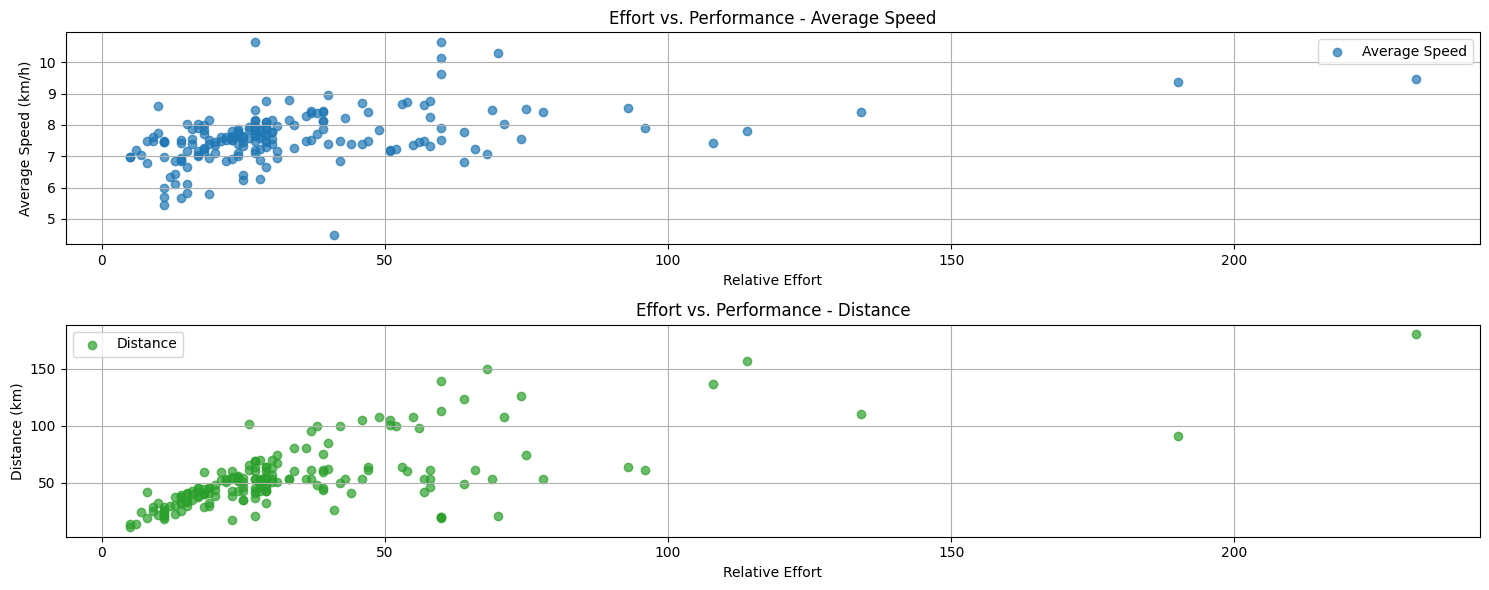

In [5]:
# Function to compare Relative Effort vs. Performance metrics
def plot_effort_vs_performance(data, x_data, y1, y2, title="", xlabel='Relative Effort', ylabel1='Average Speed (km/h)', ylabel2='Distance (km)', dpi=100):
    plt.figure(figsize=(15, 6), dpi=dpi)

    # Plot Average Speed vs. Relative Effort
    plt.subplot(2, 1, 1)
    plt.scatter(x_data, y1, color='tab:blue', alpha=0.7, label='Average Speed')
    plt.title(f'{title} - Average Speed', fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel1, fontsize=10)
    plt.grid(True, axis='both')
    plt.legend()

    # Plot Distance vs. Relative Effort
    plt.subplot(2, 1, 2)
    plt.scatter(x_data, y2, color='tab:green', alpha=0.7, label='Distance')
    plt.title(f'{title} - Distance', fontsize=12)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel2, fontsize=10)
    plt.grid(True, axis='both')
    plt.legend()

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

    # Call the function with cycling data for Effort vs. Performance
plot_effort_vs_performance(
    data=act_data_cyc,
    x_data=act_data_cyc['Relative Effort'],
    y1=act_data_cyc['Average Speed'],
    y2=act_data_cyc['Distance'],
    title='Effort vs. Performance'
)



## **Visualizing Effort vs. Performance Metrics (Speed & Distance)**
This analysis aims to explore the relationship between "Relative Effort" and key performance metrics, namely "Average Speed" and "Distance." It provides a visual representation to understand how the effort impacts these performance metrics during cycling activities.

### Objective
The main objective of this analysis is to determine whether increased relative effort correlates with changes in speed or distance. It helps to evaluate the impact of physical effort on performance outcomes and identify potential trends or patterns in athletic data.

### Trends/Patterns Found
- In the "Relative Effort" vs. "Average Speed" plot, there appears to be no consistent trend indicating a strong relationship. The speed values remain clustered between 6-10 km/h, irrespective of effort.
- In the "Relative Effort" vs. "Distance" plot, there is a positive trend, indicating that increased effort generally correlates with greater distance, especially up to a moderate effort level.
- The plots provide valuable insights, suggesting that while speed remains relatively constant, greater effort primarily affects distance, revealing distinct dynamics in how cyclists respond to increasing effort.

# **Power Output Zones**

## Defining and Visualization of Power Output Zones


Distribution of rides across power zones:
Power Zone
Moderate Intensity (100-200W)    172
High Intensity (>200W)             9
Name: count, dtype: int64


<ipython-input-6-caf7ee5c2b3b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data_cyc['Power Zone'] = act_data_cyc['Weighted Average Power'].apply(categorize_power_zone)


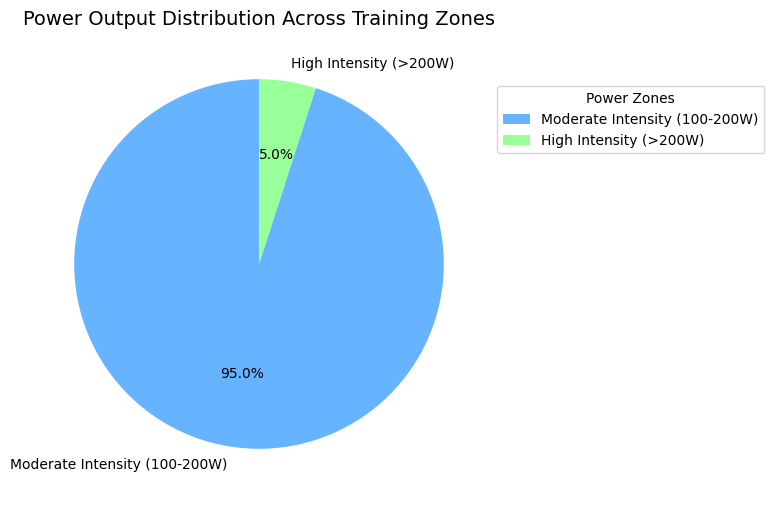

In [6]:
# Define power zones based on Weighted Average Power (WAP)
def categorize_power_zone(wap):
    if wap < 100:
        return 'Low Intensity (<100W)'
    elif 100 <= wap <= 200:
        return 'Moderate Intensity (100-200W)'
    else:
        return 'High Intensity (>200W)'

# Apply the categorization to the dataset
act_data_cyc['Power Zone'] = act_data_cyc['Weighted Average Power'].apply(categorize_power_zone)

# Count the number of sessions in each power zone
power_zone_counts = act_data_cyc['Power Zone'].value_counts()

# Display power zone counts
print("\nDistribution of rides across power zones:")
print(power_zone_counts)

# Plot the distribution of power zones
plt.figure(figsize=(8, 6))
plt.pie(
    power_zone_counts,
    labels=power_zone_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#99ff99', '#ff9999']
)

# Include title and lables
plt.title('Power Output Distribution Across Training Zones', fontsize=14)
plt.legend(title="Power Zones", loc='upper left', bbox_to_anchor=(1, 0.9))
plt.show()


## **Power Output Zones**
This analysis categorizes cycling sessions based on the "Weighted Average Power" (WAP) output into different intensity zones. It visualizes the distribution of rides across power output zones to better understand the training intensity of different sessions.

### Objective
The aim is to determine how many cycling sessions fall under each power intensity category: Low, Moderate, or High. This helps in understanding the distribution of training efforts and identifying trends in training intensities.

### Steps
- A function `categorize_power_zone` was created to classify power output into three categories: Low, Moderate, and High Intensity.
- This function was applied to each cycling session to assign a "Power Zone" category.
- The number of rides in each power zone was counted and visualized as a pie chart to represent the proportion of training efforts across different power levels.

### Trends/Patterns Found
- The pie chart shows that the majority of cycling sessions fall under the "Moderate Intensity (100-200W)" zone, making up 95% of the total sessions.
- Only a small fraction of the rides (5%) are in the "High Intensity (>200W)" category, indicating limited high-power training efforts.
- There are no rides in the "Low Intensity" category, which could mean that most training efforts maintain at least a moderate intensity level.

# **Seasonal Categorization**

## Function to Assign Seasons

In [7]:
# Function to assign season based on the month
def assign_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Summer'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Autumn'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Winter'
    else:  # September, October, November
        return 'Spring'

# Add a Season column to the DataFrame
act_data_cyc['Season'] = pd.to_datetime(act_data_cyc['Activity Date'], format='%d-%m-%Y').dt.month.apply(assign_season)

# Display the first few rows with the new 'Season' column
print("First few rows with the added 'Season' column:")
print(act_data_cyc[['Activity Date', 'Season', 'Average Speed', 'Distance', 'Max Heart Rate']].head(10))


First few rows with the added 'Season' column:
  Activity Date  Season  Average Speed  Distance  Max Heart Rate
0    13-12-2019  Summer          5.989     22.97           139.0
1    20-12-2019  Summer          6.343     29.65           133.0
2    21-12-2019  Summer          5.800     32.38           139.0
3    24-12-2019  Summer          5.697     21.68           140.0
4    26-12-2019  Summer          5.657     32.36           131.0
5    27-12-2019  Summer          6.111     32.84           139.0
6    31-12-2019  Summer          6.412     34.98           147.0
7    02-01-2020  Summer          6.846     25.22           142.0
8    03-01-2020  Summer          6.252     45.79           140.0
9    05-01-2020  Summer          5.818     34.01           136.0


<ipython-input-7-726637d17064>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_data_cyc['Season'] = pd.to_datetime(act_data_cyc['Activity Date'], format='%d-%m-%Y').dt.month.apply(assign_season)


##Seasonal Performance Analysis and Visualization (Aggregated Statistics)

In [8]:
# Group the cycling data by 'Season' and calculate mean for key metrics
seasonal_stats = act_data_cyc.groupby('Season').agg({
    'Average Speed': 'mean',
    'Distance': 'mean',
    'Max Heart Rate': 'mean',
    'Weighted Average Power': 'mean'
}).reset_index()

# Display the aggregated statistics
print("\nSeasonal performance statistics:")
print(seasonal_stats)



Seasonal performance statistics:
   Season  Average Speed   Distance  Max Heart Rate  Weighted Average Power
0  Autumn       7.753594  60.126800          142.00              166.800000
1  Spring       7.687492  63.344878          150.00              163.121951
2  Summer       7.320540  42.486769          141.80              149.292308
3  Winter       7.942038  59.378400          152.24              174.120000


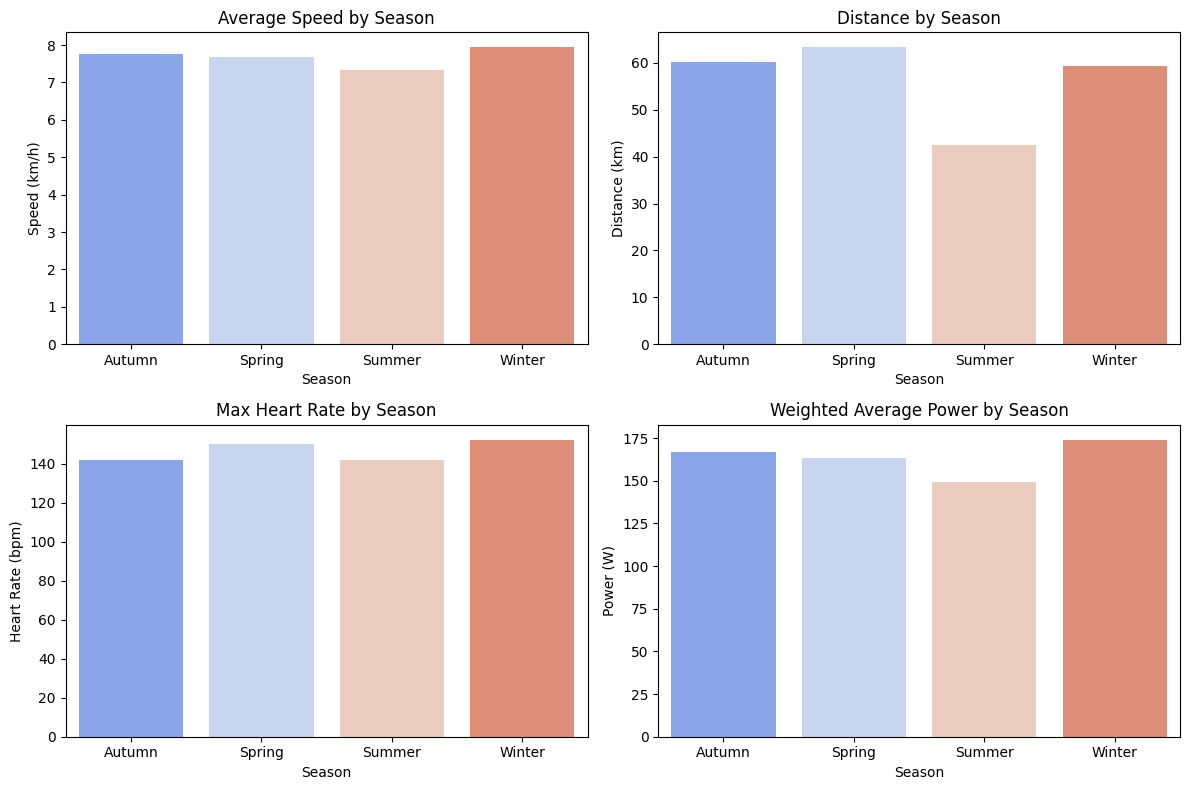

In [9]:
# Plot bar charts for seasonal performance trends
plt.figure(figsize=(12, 8))

# Average Speed by Season
plt.subplot(2, 2, 1)
sns.barplot(x='Season', y='Average Speed', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Average Speed by Season')
plt.ylabel('Speed (km/h)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Distance by Season
plt.subplot(2, 2, 2)
sns.barplot(x='Season', y='Distance', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Distance by Season')
plt.ylabel('Distance (km)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Max Heart Rate by Season
plt.subplot(2, 2, 3)
sns.barplot(x='Season', y='Max Heart Rate', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Max Heart Rate by Season')
plt.ylabel('Heart Rate (bpm)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

# Weighted Average Power by Season
plt.subplot(2, 2, 4)
sns.barplot(x='Season', y='Weighted Average Power', data=seasonal_stats, palette='coolwarm', hue='Season', dodge=False)
plt.title('Weighted Average Power by Season')
plt.ylabel('Power (W)')
plt.xlabel('Season')
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


## **Seasonal Categorization**
This analysis explores the seasonal variations in performance metrics such as average speed, distance, maximum heart rate, and weighted average power.

### Objective
The goal is to determine if different seasons have any significant impact on various cycling performance metrics and to observe how these metrics change throughout the year.

### Steps
- Each ride is categorized into a season (Summer, Autumn, Winter, Spring) based on the date of the activity.
- The dataset is grouped by season, and mean values for key metrics are computed.
- Bar plots are used to visualize the average performance for each metric across different seasons.

### Trends/Patterns Found
- Winter and Autumn have higher average speeds and weighted average power compared to other seasons, indicating higher intensity in cooler months.
- Spring records the longest average distance, while summer shows lower average distances.
- Maximum heart rate is slightly higher in winter and spring, possibly indicating increased effort during these periods.

# **Fatigue and Recovery Trend**

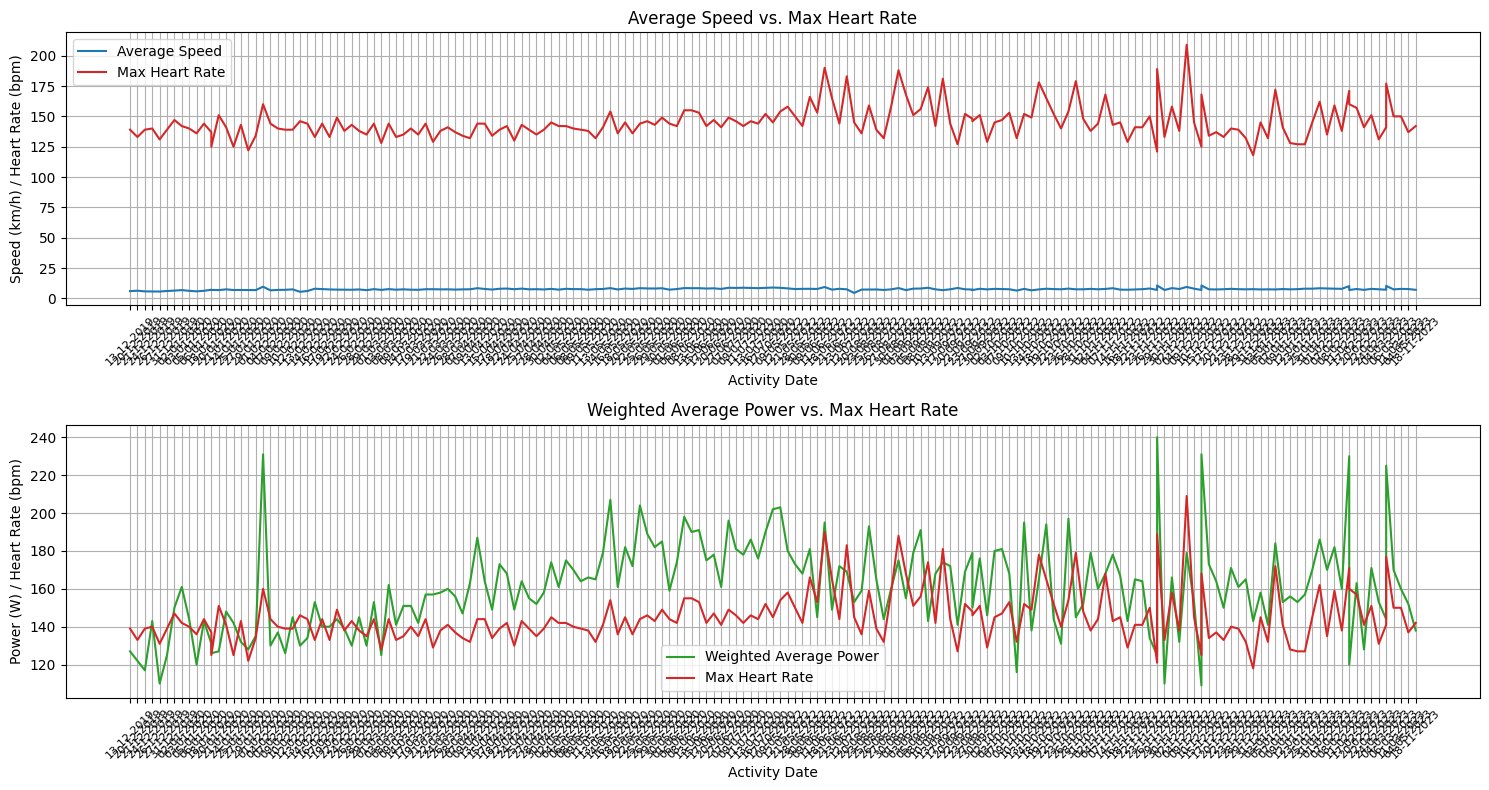

In [10]:
# Plot fatigue and recovery trends
def plot_fatigue_recovery(data, date_col, avg_speed, max_hr, power, title="Fatigue and Recovery Analysis"):
    plt.figure(figsize=(15, 8))

    # Average Speed vs. Max Heart Rate
    plt.subplot(2, 1, 1)
    plt.plot(data[date_col], data[avg_speed], color='tab:blue', label='Average Speed')
    plt.plot(data[date_col], data[max_hr], color='tab:red', label='Max Heart Rate')
    plt.title('Average Speed vs. Max Heart Rate')
    plt.xlabel('Activity Date')
    plt.ylabel('Speed (km/h) / Heart Rate (bpm)')
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.grid()

    # Weighted Average Power vs. Max Heart Rate
    plt.subplot(2, 1, 2)
    plt.plot(data[date_col], data[power], color='tab:green', label='Weighted Average Power')
    plt.plot(data[date_col], data[max_hr], color='tab:red', label='Max Heart Rate')
    plt.title('Weighted Average Power vs. Max Heart Rate')
    plt.xlabel('Activity Date')
    plt.ylabel('Power (W) / Heart Rate (bpm)')
    plt.xticks(rotation=45, fontsize=8)
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Call the function
plot_fatigue_recovery(
    data=act_data_cyc,
    date_col='Activity Date',
    avg_speed='Average Speed',
    max_hr='Max Heart Rate',
    power='Weighted Average Power',
    title='Fatigue and Recovery Analysis'
)


## **Fatigue and Recovery Trend**
This analysis aims to explore the relationship between fatigue and recovery trends through the comparison of key performance metrics over time.

### Objective
The focus is to determine how metrics like maximum heart rate correlate with performance indicators such as average speed and weighted average power over time, shedding light on athlete fatigue and recovery trends.

### Steps
- The activity data is plotted over time to compare average speed, maximum heart rate, and weighted average power.
- Two line charts are generated to observe these variables: one comparing average speed and max heart rate, and the other comparing weighted average power and max heart rate.

### Trends/Patterns Found
- The max heart rate values are generally consistent, while fluctuations in weighted average power indicate varying intensity, which is linked to fatigue and recovery cycles.
- There is a clear difference between speed and heart rate trends, suggesting that speed does not fluctuate as much as the heart rate, indicating the athlete’s effort levels and potential fatigue phases.

# **Heart Rate and Speed Trend over Time**

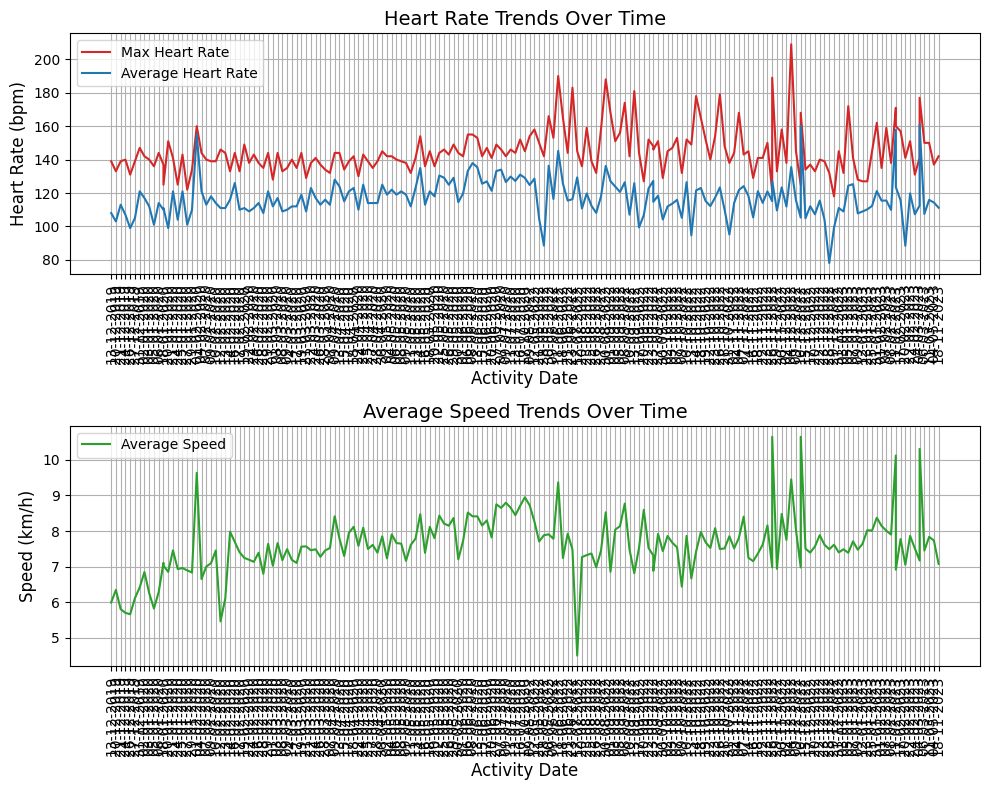

In [12]:
# Plot Heart Rate vs. Average Speed
plt.figure(figsize=(10, 8))

# Max Heart Rate vs. Average Speed over Time
plt.subplot(2, 1, 1)
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Max Heart Rate'], label='Max Heart Rate', color='tab:red')
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Average Heart Rate'], label='Average Heart Rate', color='tab:blue')
plt.title('Heart Rate Trends Over Time', fontsize=14)
plt.xlabel('Activity Date', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.legend()
plt.xticks(rotation=90)
plt.grid()

# Average Speed over Time
plt.subplot(2, 1, 2)
plt.plot(act_data_cyc['Activity Date'], act_data_cyc['Average Speed'], label='Average Speed', color='tab:green')
plt.title('Average Speed Trends Over Time', fontsize=14)
plt.xlabel('Activity Date', fontsize=12)
plt.ylabel('Speed (km/h)', fontsize=12)
plt.legend()
plt.xticks(rotation=90)
plt.grid()

plt.tight_layout()
plt.show()


## **Heart Rate and Speed Trend over Time**

This analysis visualizes trends in heart rate and speed over time for cycling activities, providing insights into the variability of these parameters.

### Objective
The objective is to observe how the maximum and average heart rates, as well as average speed, change across different rides to understand performance consistency and cardiovascular effort over time.

### Trends/Patterns Found
- The maximum heart rate shows peaks and troughs, indicating variable exertion levels across different activities, which could suggest changes in workout intensity.
- Average speed tends to fluctuate but remains relatively stable, implying consistent riding effort despite changing heart rate levels. This may indicate effective cardiovascular adaptation over time.

# **Anamoly Session Detection**

### Identify Outliers Using Z-Scores

In [13]:
from scipy.stats import zscore

# Select relevant columns for anomaly detection
metrics = ['Average Speed', 'Max Heart Rate', 'Distance', 'Weighted Average Power']

# Calculate Z-scores for the metrics
z_scores = act_data_cyc[metrics].apply(zscore)

# Identify sessions with any metric exceeding ±3 Z-scores
outliers = (z_scores.abs() > 3).any(axis=1)

# Filter and display outlier sessions
outlier_sessions = act_data_cyc[outliers]
print("\nDetected Outlier sessions:")
print(outlier_sessions[['Activity Date', 'Average Speed', 'Max Heart Rate', 'Distance', 'Weighted Average Power']])



Detected Outlier sessions:
    Activity Date  Average Speed  Max Heart Rate  Distance  \
119    11-06-2022       9.370151           190.0     91.16   
131    12-07-2022       4.495522           145.0     25.84   
143    30-08-2022       8.526998           188.0     63.39   
201    28-10-2022       7.511878           148.0    139.09   
209    04-11-2022       7.804596           168.0    156.53   
225    26-11-2022      10.652390           189.0     20.50   
237    04-12-2022       9.453102           209.0    180.08   
238    10-12-2022      10.652900           168.0     19.65   
300    04-03-2023      10.312165           177.0     20.48   
343    18-11-2023       7.074378           142.0    150.03   

     Weighted Average Power  
119                   195.0  
131                   153.0  
143                   175.0  
201                   152.0  
209                   168.0  
225                   240.0  
237                   179.0  
238                   231.0  
300                

### Visualize Outliers

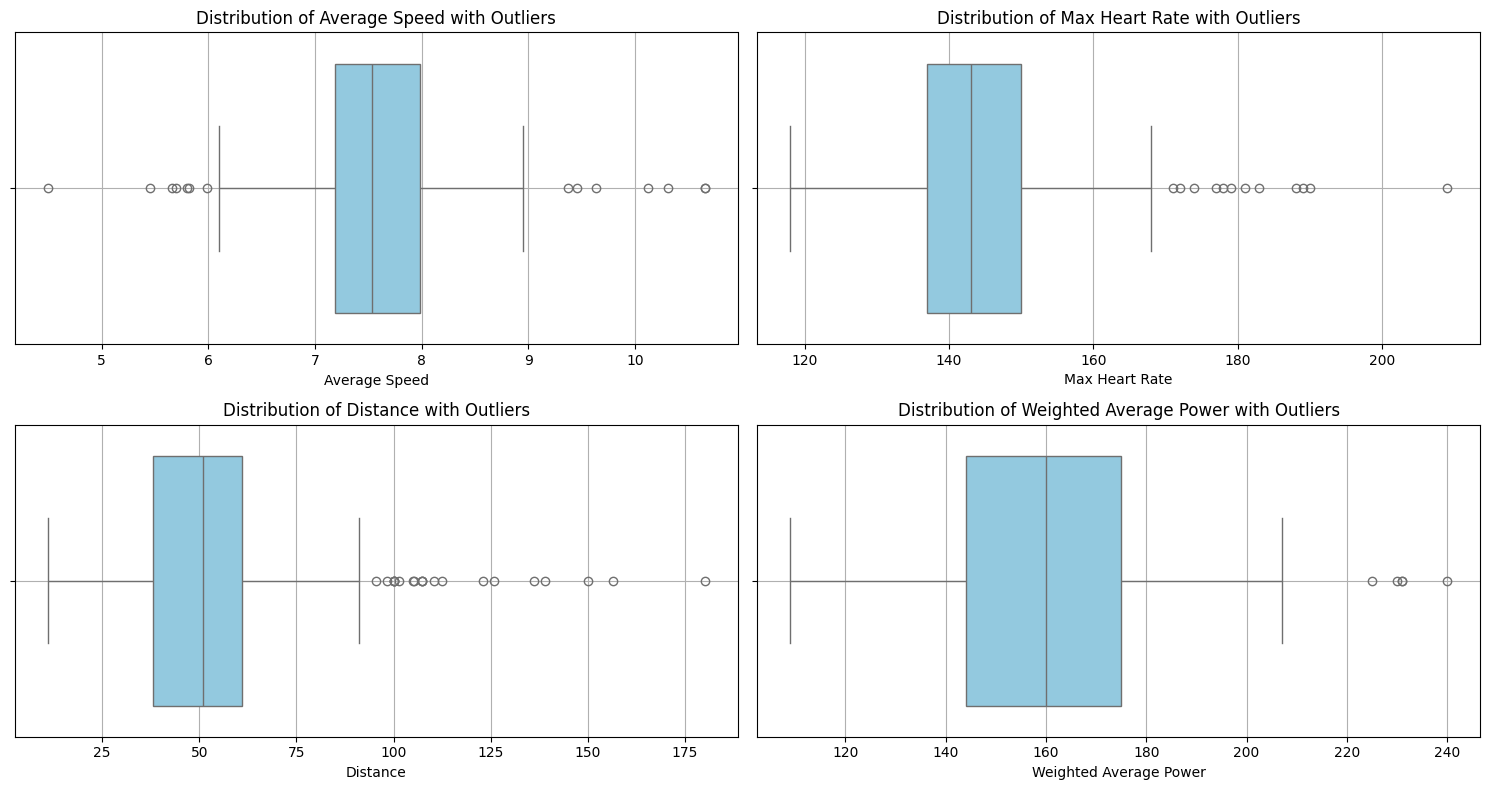

In [14]:
# Plot box plots for key metrics with outliers
plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=act_data_cyc, x=metric, color='skyblue')
    plt.title(f"Distribution of {metric} with Outliers", fontsize=12)
    plt.xlabel(metric, fontsize=10)
    plt.grid()

plt.tight_layout()
plt.show()


## **Anamoly Session Detection**

This analysis aims to detect anomalies (outliers) in key performance metrics using statistical methods.

### Objective
The goal is to identify sessions that deviate significantly from the typical range in metrics such as Average Speed, Max Heart Rate, Distance, and Weighted Average Power.

### Steps
- **Z-Score Calculation**: Z-scores for selected metrics were computed to determine how many standard deviations each value is from the mean.
- **Outlier Detection**: Sessions where Z-scores exceeded ±3 were flagged as outliers.
- **Box Plot Visualization**: Box plots were used to illustrate the distribution of metrics, highlighting potential outliers.

### Trends/Patterns Found
- Metrics like Average Speed, Max Heart Rate, Distance, and Weighted Average Power have visible outliers that exceed the normal data range.
- The outliers indicate sessions with particularly high intensity or anomalies in measurements, which might require further investigation or correction to ensure data integrity.

# **Training Volume vs. Intensity Balance**

### Plot for Volume vs. Intensity

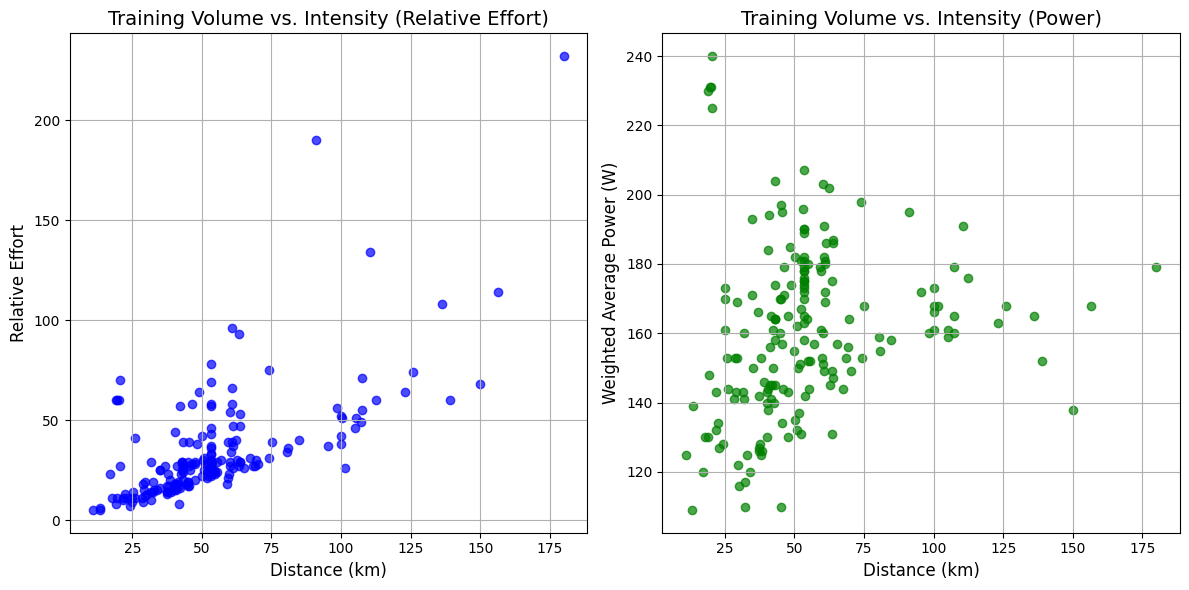

In [15]:
# Plot Distance vs. Relative Effort
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(act_data_cyc['Distance'], act_data_cyc['Relative Effort'], alpha=0.7, color='blue')
plt.title('Training Volume vs. Intensity (Relative Effort)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Relative Effort', fontsize=12)
plt.grid()

# Plot Distance vs. Weighted Average Power
plt.subplot(1, 2, 2)
plt.scatter(act_data_cyc['Distance'], act_data_cyc['Weighted Average Power'], alpha=0.7, color='green')
plt.title('Training Volume vs. Intensity (Power)', fontsize=14)
plt.xlabel('Distance (km)', fontsize=12)
plt.ylabel('Weighted Average Power (W)', fontsize=12)
plt.grid()

plt.tight_layout()
plt.show()


### Correlation of Weighted Average Power and Relative Effort Between Distance

In [ ]:
# Calculate correlation coefficients
correlation_effort = act_data_cyc['Distance'].corr(act_data_cyc['Relative Effort'])
correlation_power = act_data_cyc['Distance'].corr(act_data_cyc['Weighted Average Power'])

print(f"Correlation between Distance and Relative Effort: {correlation_effort:.2f}")
print(f"Correlation between Distance and Weighted Average Power: {correlation_power:.2f}")


Correlation between Distance and Relative Effort: 0.66
Correlation between Distance and Weighted Average Power: 0.18


## **Training Volume vs. Intensity Balance**
This analysis visualizes the relationship between training volume (distance) and training intensity using metrics like Relative Effort and Weighted Average Power.

### Ojective
The goal is to explore how the training intensity (effort and power) scales with the training volume (distance).

### Steps
- **Scatter Plot for Relative Effort vs Distance**: Created to illustrate how relative effort changes with varying distances.
- **Scatter Plot for Weighted Average Power vs Distance**: Created to explore the correlation between power and distance.
- **Correlation Calculation**: Correlation coefficients between distance and both metrics (Relative Effort and Power) were calculated to quantify the relationships.

### Trends/Patterns Found
- **Positive Correlation with Relative Effort**: There is a moderate positive correlation (0.66) between distance and relative effort, indicating that as distance increases, effort generally rises.
- **Weak Correlation with Weighted Power**: The correlation between distance and weighted power is relatively weak (0.18), suggesting power output remains more consistent across distances.